1. train : 학습용 데이터셋

	├ 10001 : 데이터 고유 아이디

	│	├ 10001.jpg : 이미지 파일

	│	├ 10001.csv : 환경 데이터

	│		└ 촬영 전 48 시간의 "측정 시각", "내부 온도", "내부 습도", "내부 이슬점", "내부 CO2", "외부 풍속", "외부 누적일사" 등의 환경 정보

	│	└ 10001.json :

	│		├ description 

	│		│	├ image : 이미지 파일 이름

	│		│	├ date : 촬영 날짜

	│		│	├ time : 촬영 시간

	│		│	├ region : 촬영 지역

	│		│	├ height : 이미지 높이

	│		│	├ width : 이미지 너비

	│		│	└  task : 데이터 종류 (질병/해충/병해/정상 구분)

	│		└ annotations

	│				├ disease : 작물 상태 코드

	│				├ crop : 작물 코드

	│				├ area : 작물 촬영 부위

	│				├ grow : 작물의 생육 단계 

	│				├ risk : 질병 피해 정도

	│				├ bbox : 주목 객체 바운딩 박스 (x, y, w, h 형태)

	│				└ part : 병해 부위 바운딩 박스 (x, y, w, h 형태)

	│

	├ 10002

	├ 10003

	└ ...

	[추가] train.csv : train set에 대한 정답 파일

 image : 이미지 파일 이름
 label : "{작물 코드}_{작물 상태 코드}_{질병 피해 정도}" 형태의 문자열
 "{crop}_{disease}_{risk}"




2. test : 평가용 데이터셋

	├ 10001 : 데이터 고유 아이디

	│	├ 10001.csv : 환경 데이터

	│		└ 촬영 전 48 시간의 "측정 시각", "내부 온도", "내부 습도", "내부 이슬점", "내부 CO2", "외부 풍속", "외부 누적일사" 등의 환경 정보

	│	└ 10001.jpg : 이미지 파일

	│

	├ 10002

	├ 10003

	└ ...



3. sample_submission.csv : 제출용 양식

 image : 이미지 파일 이름
 label : "{작물 코드}_{작물 상태 코드}_{질병 피해 정도}" 형태의 문자열
 "{crop}_{disease}_{risk}"

In [30]:
import pandas as pd
import json
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [ ]:
def data_pro(drop_col,path): #path는 읽어올 데이터가 있는 곳
    all_csv = pd.DataFrame() #처음 concat을 위한 빈 frame
    all_json_csv = pd.DataFrame()
    for i in tqdm(range(len((glob('data/train/*')))),desc='진행률'): # len((glob('data/train/*'))) == 폴더 개수만큼 for문 돌자
        path = glob('data/train/*')[i] #train 폴더 안 각 폴더를 하나씩 불러온다.
        csvs = pd.read_csv(glob(path+'/*.csv')[0]) #폴더내 csv파일 읽기 [0]은 혹시 csv가 두개 이상 있을경우 하나만 지정하기 위함.
        jsons = json.load(open(glob(path+'/*.json')[0],'r')) #Json파일 읽기
        csvs['image'] = jsons['description']['image'] #각 폴더별 시계열 데이터를 구별하기 위한 값으로 이미지 name
        csvs = csvs.drop(columns=drop_col)# 전체시계열에서 '-'만 존재했던 컬럼들의 모음을 drop 
        all_csv = pd.concat([all_csv,csvs]) 

        
        json_csv = pd.json_normalize(jsons) # json파일의 csv화 
        all_json_csv = pd.concat([all_json_csv,json_csv])
    all_json_csv = all_json_csv[['description.image','description.crop','description.disease','description.grow','description.risk']] #분석에 필요한 컬럼들만 골라내기
    all_json_csv.columns = ['image','crop','disease','grow','risk'] #컬럼네임 간소화
    path = path #분석자료로 사용될 csv 저장위치 설정
    all_csv.to_csv(path+'/전체시계열_csv.csv',index=False)
    all_json_csv.to_csv(path+'/json_csv.csv',index=False)
    return all_csv,all_json_csv
data_pro(drop_col,'./analysis')

In [78]:
sample = glob('데이터톤/train/*')[0]
sample_csv = pd.read_csv(glob(sample+'/*.csv')[0])
sample_csv.head()

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,배지 중량 최저,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적
0,2021-10-13 20:20:00,20.7,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2021-10-13 20:10:00,20.9,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,2021-10-13 20:00:00,21.0,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,2021-10-13 19:50:00,20.9,21.5,20.4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,2021-10-13 19:40:00,21.0,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
len(glob('데이터톤/train/*'))

5767

In [ ]:
sam = glob('데이터톤/train/*')[0]
all_csv = pd.read_csv(glob(sam+'/*.csv')[0])

for i in range(1,len(glob('데이터톤/train/*'))):
    sample = glob('데이터톤/train/*')[i]
    sample_csv = pd.read_csv(glob(sample+'/*.csv')[0])
    all_csv = pd.concat([all_csv,sample_csv])

In [ ]:
#'-' 1778127 인 컬럼들 골라내기
for i in all_csv.columns:
    print(all_csv[i].value_counts())
    


2021-11-01 14:50:00    619
2021-09-14 16:10:00    617
2021-11-01 19:00:00    616
2021-11-01 18:10:00    616
2021-11-01 19:30:00    616
                      ... 
2021-09-17 09:50:00      1
2021-10-25 15:40:00      1
2021-10-25 15:50:00      1
2021-10-25 16:00:00      1
2021-07-06 10:50:00      1
Name: 측정시각, Length: 14282, dtype: int64
20.1    24380
19.2    18801
19.4    17656
19.1    16461
19.5    15963
        ...  
45.8        8
44.3        8
44.6        4
46.6        4
44.2        4
Name: 내부 온도 1 평균, Length: 435, dtype: int64
20.1    23087
19.3    20167
18.8    17398
19.8    17066
19.4    16936
        ...  
44.2        4
46.9        4
45.7        4
44.8        4
44.4        4
Name: 내부 온도 1 최고, Length: 434, dtype: int64
20.1    23363
19.1    22186
19.3    17847
18.6    17204
17.6    16790
        ...  
46.4        8
47.0        4
46.2        4
43.9        4
44.4        4
Name: 내부 온도 1 최저, Length: 432, dtype: int64
-       1769895
11.1        308
10.6        280
11.3        280
11.2 

In [79]:
drop_col = [
    '내부 온도 4 평균','내부 온도 4 최고','내부 온도 4 최저',
    '내부 습도 4 평균','내부 습도 4 최고','내부 습도 4 최저',
    '외부 풍속 평균','외부 풍속 최고','외부 풍속 최저',
    '내부 EC 1 평균','내부 EC 1 최고','내부 EC 1 최저',
    '내부 PH 1 평균','내부 PH 1 최고','내부 PH 1 최저',
    '배지 중량 평균','배지 중량 최고','배지 중량 최저',
    '양액 온도 평균','양액 온도 최고','양액 온도 최저',
    '외부 풍향 수치','외부 풍향','외부 빗물 시간',
    '양액 급액 누적','양액 배액 누적'
] 

In [ ]:
sample_csv.drop(columns=drop_col)
sample_csv['image'] = 123
sample_csv

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적,image
0,2021-07-13 09:50:00,36.9,37.1,36.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
1,2021-07-13 09:50:00,36.1,36.4,35.8,-,-,-,-,-,-,...,-,-,-,-,-,-,679.0,-,-,123
2,2021-07-13 09:40:00,36.0,36.3,35.9,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
3,2021-07-13 09:40:00,35.4,35.6,35.3,-,-,-,-,-,-,...,-,-,-,-,-,-,580.3,-,-,123
4,2021-07-13 09:30:00,35.6,35.8,35.4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2021-07-11 09:20:00,35.2,35.3,34.9,-,-,-,-,-,-,...,-,-,-,-,-,-,385.7,-,-,123
584,2021-07-11 09:10:00,35.2,35.5,35.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
585,2021-07-11 09:10:00,35.0,35.3,34.7,-,-,-,-,-,-,...,-,-,-,-,-,-,473.2,-,-,123
586,2021-07-11 09:00:00,34.4,35.0,33.8,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123


In [118]:
# all_csv = pd.DataFrame()
all_json_csv = pd.DataFrame()
for i in tqdm(range(len((glob('데이터톤/train/*')))),desc='진행률'):
    path = glob('데이터톤/train/*')[i]
    # csvs = pd.read_csv(glob(path+'/*.csv')[0])
    jsons = json.load(open(glob(path+'/*.json')[0],'r'))
    # csvs['image'] = jsons['description']['image']
    # csvs = csvs.drop(columns=drop_col)
    # all_csv = pd.concat([all_csv,csvs])
    
    json_csv = pd.json_normalize(jsons)
    all_json_csv = pd.concat([all_json_csv,json_csv])
all_json_csv = all_json_csv[['description.image','annotations.crop','annotations.disease','annotations.grow','annotations.risk']]
all_json_csv.columns = ['image','crop','disease','grow','risk']    
path = '.'
# all_csv.to_csv(path+'/전체시계열_csv.csv',index=False)
all_json_csv.to_csv(path+'/json_csv.csv',index=False)


진행률: 100%|██████████| 5767/5767 [01:13<00:00, 78.09it/s]


In [95]:
type(jsons['description']['image'])

str

In [116]:
all_json_csv

,image,crop,disease,grow,risk
0,38254.jpg,2,00,13,0
0,21379.jpg,4,00,13,0
0,29114.jpg,6,00,24,0
0,51832.jpg,5,b6,13,1
0,65835.jpg,3,00,12,0
...,...,...,...,...,...
0,30042.jpg,3,00,11,0
0,59218.jpg,4,00,12,0
0,23031.jpg,6,00,24,0
0,14481.jpg,3,b8,13,1


In [136]:
#crop 1인 데이터를 필터해서 csv로 만들기
crop_1 = all_json_csv[all_json_csv['crop']==1]
total_data = pd.DataFrame()
for i in crop_1['image']:
    # print(i[:-4])
    filter_path = '데이터톤/train/'
    filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
    filter_data['image'] = i
    filter_data.drop(columns=drop_col,inplace=True)
    total_data = pd.concat([total_data,filter_data])
total_data

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,내부 습도 3 최고,내부 습도 3 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,내부 CO2 평균,내부 CO2 최고,내부 CO2 최저,외부 누적일사 평균,image
0,2021-10-15 09:10:00,23.0,23.1,22.9,-,-,-,-,-,-,...,-,-,17.9,18.1,17.7,452.2,456.0,447.0,-,26538.jpg
1,2021-10-15 09:00:00,23.1,23.2,22.9,-,-,-,-,-,-,...,-,-,18.2,18.4,17.9,451.5,456.0,448.0,-,26538.jpg
2,2021-10-15 08:50:00,22.6,22.9,22.3,-,-,-,-,-,-,...,-,-,18.1,19.0,17.4,455.1,458.0,452.0,-,26538.jpg
3,2021-10-15 08:40:00,22.0,22.3,21.8,-,-,-,-,-,-,...,-,-,17.6,17.8,17.4,456.9,460.0,454.0,-,26538.jpg
4,2021-10-15 08:30:00,22.0,22.1,21.9,-,-,-,-,-,-,...,-,-,17.8,18.2,17.4,456.7,459.0,453.0,-,26538.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2021-10-05 09:40:00,29.7,30.3,29.4,-,-,-,-,-,-,...,-,-,23.8,24.9,22.7,407.9,412.0,402.0,-,55277.jpg
290,2021-10-05 09:30:00,29.5,29.9,29.0,-,-,-,-,-,-,...,-,-,24.4,25.3,23.7,419.0,429.0,410.0,-,55277.jpg
291,2021-10-05 09:20:00,28.6,29.1,28.1,-,-,-,-,-,-,...,-,-,23.6,24.6,22.7,432.1,438.0,428.0,-,55277.jpg
292,2021-10-05 09:10:00,27.6,28.2,27.0,-,-,-,-,-,-,...,-,-,23.7,24.4,23.1,432.6,437.0,427.0,-,55277.jpg


In [142]:
for j in total_data.columns:
    print(total_data[j].value_counts())

2021-10-07 00:40:00    257
2021-10-06 23:30:00    257
2021-10-06 22:00:00    257
2021-10-06 22:10:00    257
2021-10-06 22:20:00    257
                      ... 
2021-10-15 10:30:00      5
2021-09-16 18:20:00      3
2021-09-23 11:50:00      3
2021-10-08 10:10:00      2
2021-11-02 10:20:00      2
Name: 측정시각, Length: 1939, dtype: int64
19.3    5598
19.6    3693
19.2    3557
19.4    3538
19.1    3279
        ... 
14.2      28
13.5      28
13.0      28
11.5      28
15.0      28
Name: 내부 온도 1 평균, Length: 227, dtype: int64
19.3    6848
19.6    4845
19.4    4191
20.3    3765
19.8    3600
        ... 
9.4       28
14.1      28
12.8      28
12.2      28
9.7       28
Name: 내부 온도 1 최고, Length: 232, dtype: int64
19.3    5031
19.1    4921
19.6    3941
19.2    3838
20.1    3514
        ... 
14.4      28
14.0      28
13.8      28
11.2      28
13.7      28
Name: 내부 온도 1 최저, Length: 226, dtype: int64
-       224846
11.1       308
10.6       280
11.3       280
11.2       196
         ...  
32.0        2

In [149]:
#crop 1인 데이터를 필터해서 csv로 만들기
drop_col = [
    '내부 온도 4 평균','내부 온도 4 최고','내부 온도 4 최저',
    '내부 습도 4 평균','내부 습도 4 최고','내부 습도 4 최저',
    '외부 풍속 평균','외부 풍속 최고','외부 풍속 최저',
    '내부 EC 1 평균','내부 EC 1 최고','내부 EC 1 최저',
    '내부 PH 1 평균','내부 PH 1 최고','내부 PH 1 최저',
    '배지 중량 평균','배지 중량 최고','배지 중량 최저',
    '양액 온도 평균','양액 온도 최고','양액 온도 최저',
    '외부 풍향 수치','외부 풍향','외부 빗물 시간',
    '양액 급액 누적','양액 배액 누적'
] 

crop_1 = all_json_csv[all_json_csv['crop']==1]

def filter(data,drop_col):
    total_data = pd.DataFrame()
    for i in data['image']:
        # print(i[:-4])
        filter_path = '데이터톤/train/'
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data['image'] = i
        filter_data.drop(columns=drop_col,inplace=True)
        total_data = pd.concat([total_data,filter_data])

    return total_data

filter(crop_1,drop_col)

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,내부 습도 3 최고,내부 습도 3 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,내부 CO2 평균,내부 CO2 최고,내부 CO2 최저,외부 누적일사 평균,image
0,2021-10-15 09:10:00,23.0,23.1,22.9,-,-,-,-,-,-,...,-,-,17.9,18.1,17.7,452.2,456.0,447.0,-,26538.jpg
1,2021-10-15 09:00:00,23.1,23.2,22.9,-,-,-,-,-,-,...,-,-,18.2,18.4,17.9,451.5,456.0,448.0,-,26538.jpg
2,2021-10-15 08:50:00,22.6,22.9,22.3,-,-,-,-,-,-,...,-,-,18.1,19.0,17.4,455.1,458.0,452.0,-,26538.jpg
3,2021-10-15 08:40:00,22.0,22.3,21.8,-,-,-,-,-,-,...,-,-,17.6,17.8,17.4,456.9,460.0,454.0,-,26538.jpg
4,2021-10-15 08:30:00,22.0,22.1,21.9,-,-,-,-,-,-,...,-,-,17.8,18.2,17.4,456.7,459.0,453.0,-,26538.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2021-10-05 09:40:00,29.7,30.3,29.4,-,-,-,-,-,-,...,-,-,23.8,24.9,22.7,407.9,412.0,402.0,-,55277.jpg
290,2021-10-05 09:30:00,29.5,29.9,29.0,-,-,-,-,-,-,...,-,-,24.4,25.3,23.7,419.0,429.0,410.0,-,55277.jpg
291,2021-10-05 09:20:00,28.6,29.1,28.1,-,-,-,-,-,-,...,-,-,23.6,24.6,22.7,432.1,438.0,428.0,-,55277.jpg
292,2021-10-05 09:10:00,27.6,28.2,27.0,-,-,-,-,-,-,...,-,-,23.7,24.4,23.1,432.6,437.0,427.0,-,55277.jpg


In [4]:
json_csv = pd.read_csv('analysis/json_csv.csv')
json_csv

,image,crop,disease,grow,risk
0,38254.jpg,2,00,13,0
1,21379.jpg,4,00,13,0
2,29114.jpg,6,00,24,0
3,51832.jpg,5,b6,13,1
4,65835.jpg,3,00,12,0
...,...,...,...,...,...
5762,30042.jpg,3,00,11,0
5763,59218.jpg,4,00,12,0
5764,23031.jpg,6,00,24,0
5765,14481.jpg,3,b8,13,1


In [198]:
json_csv['image'][0][:-4]

'38254'

In [162]:
filter = (json_csv['crop'] == 5) & (json_csv['disease'] != '00')
crop_1 = json_csv[filter]
crop_1
def filter(data,drop_col):
    total_data = pd.DataFrame()
    for i in data['image']:
        # print(i[:-4])
        filter_path = '데이터톤/train/'
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data['image'] = i
        filter_data.drop(columns=drop_col,inplace=True)
        total_data = pd.concat([total_data,filter_data])

    return total_data
# 
# filter(crop_1,drop_col)

,image,crop,disease,grow,risk
3,51832.jpg,5,b6,13,1
15,43993.jpg,5,a7,13,2
17,65499.jpg,5,b7,11,1
19,20409.jpg,5,b7,11,1
21,44528.jpg,5,b7,11,1
...,...,...,...,...,...
5709,20011.jpg,5,b7,11,1
5732,18273.jpg,5,b7,11,1
5741,44305.jpg,5,b8,13,1
5742,25332.jpg,5,b6,13,1


In [21]:
csv_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 습도 1 평균', '내부 습도 1 최고', 
                '내부 습도 1 최저', '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']
filter_path = 'data/train/'
filter_data = pd.read_csv(filter_path+'51832/51832.csv')
filter_data = filter_data[csv_features]
filter_data['순서'] = filter_data.index
filter_data

,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,순서
0,18.3,18.4,18.1,61.5,63.1,60.1,10.6,10.9,10.2,0
1,17.3,18.1,16.9,63.7,64.8,62.5,10.4,11.4,9.9,1
2,17.6,17.7,17.2,64.8,66.3,62.7,11.1,11.6,9.9,2
3,17.0,17.5,16.4,67.8,69.3,66.0,11.2,11.8,10.4,3
4,16.5,16.6,16.4,68.7,69.7,68.2,10.7,11.5,10.1,4
...,...,...,...,...,...,...,...,...,...,...
289,19.2,19.3,19.1,67.0,67.8,66.5,12.8,13.0,12.8,289
290,19.1,19.2,19.1,67.4,67.8,66.5,12.9,13.0,12.8,290
291,19.0,19.2,18.6,67.6,68.2,66.5,13.0,13.0,12.8,291
292,18.9,19.3,18.7,66.9,67.9,65.9,12.8,13.0,12.5,292


## 시계열 시각화

In [126]:
filter_0 = (json_csv['crop'] == 3) & (json_csv['disease'] == '00')
crop_0 = json_csv[filter_0]
crop_0
filter_1 = (json_csv['crop'] == 3) & (json_csv['disease'] == 'b3')
crop_1 = json_csv[filter_1]
crop_1

,image,crop,disease,grow,risk
102,36792.jpg,3,b3,13,1
144,21979.jpg,3,b3,13,1
211,11777.jpg,3,b3,13,1
393,26968.jpg,3,b3,13,1
420,31913.jpg,3,b3,13,1
...,...,...,...,...,...
5494,38844.jpg,3,b3,13,1
5530,39195.jpg,3,b3,13,1
5548,44531.jpg,3,b3,13,1
5591,35995.jpg,3,b3,13,1


In [106]:
crop_0[crop_0['image'] == '51062.jpg']
crop_0 = crop_0.drop(307)

In [92]:
keep = 0
for j in crop_0['image']:
    path_a = 'data/train/'
    len_data = pd.read_csv(path_a+f'{j[:-4]}/{j[:-4]}.csv')
    if keep == 0:
        keep = len(len_data)
    elif keep > len(len_data):
        print(j,len(len_data))
        keep = len(len_data)
keep

37812.jpg 240
43734.jpg 152


152

In [107]:
csv_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 습도 1 평균', '내부 습도 1 최고', 
                '내부 습도 1 최저', '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']

def pivot(data):
    filter_path = 'data/train/'
    keep = 0
    for j in data['image']: #최소길이 반환 keep
        
        len_data = pd.read_csv(filter_path+f'{j[:-4]}/{j[:-4]}.csv')
        if keep == 0:
            keep = len(len_data)
        elif keep > len(len_data):
            keep = len(len_data)
    
    total_data = pd.read_csv(filter_path+data['image'].iloc[0][:-4]+'/'+data['image'].iloc[0][:-4]+'.csv')
    total_data = total_data[csv_features].iloc[:keep+1]
    total_data['시계열']=total_data.index
    for i in data['image'][1:]:
        
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data = filter_data[csv_features].iloc[:keep+1]
        filter_data['시계열']=filter_data.index
        total_data = pd.concat([total_data,filter_data], axis=0)
    total_data1 = total_data.pivot_table(index="시계열",values=filter_data.columns,aggfunc='mean')
    total_data2 = total_data.pivot_table(index="시계열",values=filter_data.columns,aggfunc='std')

    return total_data1,total_data2
# 
# filter(crop_1,drop_col)
prac1,prac2 = pivot(crop_0)
prac1

,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
시계열,,,,,,,,,
0,63.041497,59.940731,61.393793,26.775000,26.382568,26.589541,18.999915,17.968537,18.466752
1,63.160289,60.365476,61.739201,26.753741,26.403571,26.585374,19.019473,18.081718,18.555612
2,63.647534,61.002381,62.345833,26.561310,26.234609,26.412840,18.972024,18.037925,18.517517
3,64.692262,61.900765,63.259949,26.304847,25.955527,26.143622,18.960629,18.020918,18.472789
4,65.060119,62.288776,63.673044,26.122959,25.778741,25.961310,18.865816,17.935034,18.395833
...,...,...,...,...,...,...,...,...,...
148,68.541241,66.018622,67.311565,25.678146,25.333844,25.509609,19.317687,18.528316,18.927381
149,68.967857,66.366327,67.684694,25.578997,25.229762,25.411905,19.341497,18.464796,18.916156
150,69.523044,66.680867,68.076105,25.452126,25.091497,25.272449,19.325170,18.481037,18.897704


In [127]:
prac2_1,prac2_2 = pivot(crop_1)

In [128]:
prac2_1 = prac2_1.iloc[:152]
prac2_2 = prac2_2.iloc[:152]
prac2_3 = prac2_3.iloc[:152]
prac2_4 = prac2_4.iloc[:152]

In [129]:
prac3 = prac1-prac2
prac4 = prac1+prac2
prac4
prac2_3 = prac2_1-prac2_2
prac2_4 = prac2_1+prac2_2
prac2_4


,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
시계열,,,,,,,,,
0,65.761363,64.134838,64.993342,19.012589,18.538212,18.763850,12.100858,11.365325,11.678615
1,66.658885,64.573566,65.591250,19.149485,18.441849,18.794688,12.312712,11.427615,11.856882
2,67.396588,65.357855,66.350423,19.373596,18.762037,19.078514,12.649476,11.631578,12.197009
3,68.413367,66.607932,67.405472,18.986352,18.311762,18.603676,12.780589,11.769474,12.180963
4,69.023720,67.256528,67.969590,18.545430,18.029221,18.246352,12.600999,11.736605,12.089087
...,...,...,...,...,...,...,...,...,...
147,70.007304,67.848334,68.827917,20.753958,20.440438,20.617657,12.834721,12.105892,12.377561
148,71.038051,68.322715,69.494828,20.612583,20.270848,20.461794,12.841927,12.186283,12.482267
149,72.231226,68.467331,70.055872,20.523816,20.217817,20.384472,12.950727,12.216114,12.545107


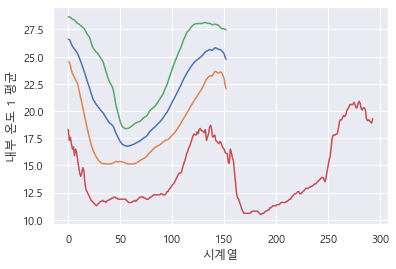

In [76]:
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac1)
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac3)
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac4)

d_graph = sns.lineplot(x='순서',y='내부 온도 1 평균',data=filter_data)
plt.pause(1)
d_graph.remove()

<AxesSubplot:xlabel='시계열', ylabel='내부 이슬점 평균'>

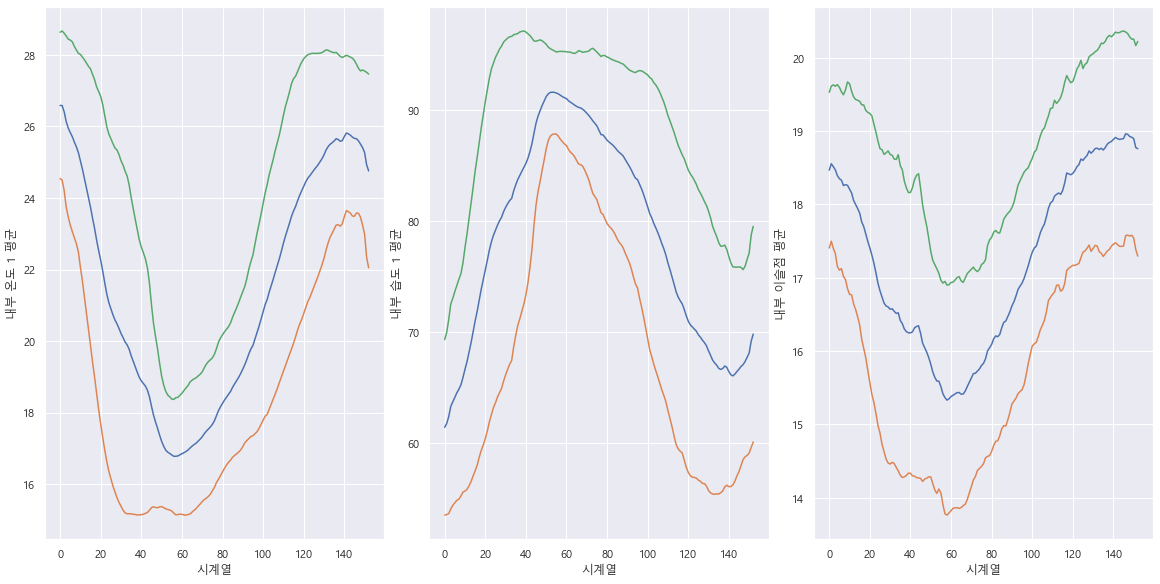

In [95]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=1,constrained_layout=True)


sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac1,ax=axs[0])
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac3,ax=axs[0])
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac4,ax=axs[0])

sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac1,ax=axs[1])
sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac3,ax=axs[1])
sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac4,ax=axs[1])

sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac1,ax=axs[2])
sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac3,ax=axs[2])
sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac4,ax=axs[2])

<AxesSubplot:xlabel='시계열', ylabel='내부 이슬점 평균'>

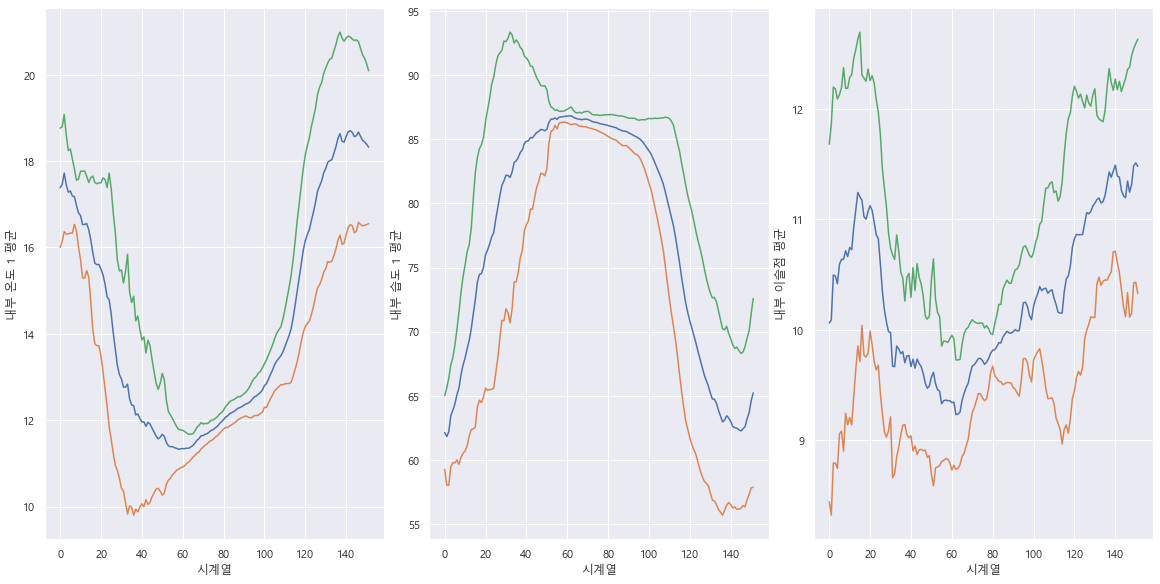

In [130]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=1,constrained_layout=True)


sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac2_1,ax=axs[0])
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac2_3,ax=axs[0])
sns.lineplot(x='시계열',y='내부 온도 1 평균',data=prac2_4,ax=axs[0])

sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac2_1,ax=axs[1])
sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac2_3,ax=axs[1])
sns.lineplot(x='시계열',y='내부 습도 1 평균',data=prac2_4,ax=axs[1])

sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac2_1,ax=axs[2])
sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac2_3,ax=axs[2])
sns.lineplot(x='시계열',y='내부 이슬점 평균',data=prac2_4,ax=axs[2])

## 이미지 함수

In [132]:
def show_img(data,path,figsize=(16,8)): #data 개수를 iloc으로 조절하면서 넣어주세요. path == train set 경로
    
    cv_visual = data['image']
    cnt = len(cv_visual)
    if cnt%4 == 0:
        fig, axs = plt.subplots(figsize=figsize , ncols=4 , nrows=int(cnt/4),constrained_layout=True)
    else:
        fig, axs = plt.subplots(figsize=figsize , ncols=4 , nrows=(cnt//4)+1,constrained_layout=True)

    for num,i in enumerate(cv_visual):
        path = path
        row = int(num/4)
        col = num%4

        with open(path+f'/{i[:-4]}/{i[:-4]}.json') as f:
            q_json = json.load(f)
        img = cv2.imread(path+f'/{i[:-4]}/{i}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # plt.imshow(img)
        box = q_json['annotations']['bbox'][0]
        part = q_json['annotations']['part']
        img = cv2.rectangle(img,(int(box['x']),int(box['y'])),(int(box['x']+box['w']),int(box['y']+box['h'])),(0,255,255),3) # bbox

        for j in range(len(part)):
            img = cv2.rectangle(img,(int(part[j]['x']),int(part[j]['y'])),(int(part[j]['x']+part[j]['w']),int(part[j]['y']+part[j]['h'])),(255,0,0),5) #part
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2는 기본이 bgr값 plt에서는 rgb값을 사용하기 때문에 변경

        axs[row][col].axis('off')
        axs[row][col].imshow(img)
        axs[row][col].set_title(i)

## 라인그래프 함수

In [133]:
def show_line(data,path,figsize=(16,8)): #data 개수를 iloc으로 조절하면서 넣어주세요. path == train set 경로
    
    json_csv = data['image']
    cnt = len(json_csv)
    if cnt%4 == 0:
        fig, axs = plt.subplots(figsize=figsize , ncols=4 , nrows=int(cnt/4),constrained_layout=True)
    else:
        fig, axs = plt.subplots(figsize=figsize , ncols=4 , nrows=(cnt//4)+1,constrained_layout=True)

    for num,i in enumerate(json_csv):
        path = path
        row = int(num/4)
        col = num%4

        visual_csv = pd.read_csv('data/train'+f'/{i[:-4]}/{i[:-4]}.csv')
        
        sns.lineplot(x='측정시각',y='내부 온도 1 평균',data=visual_csv,ax=axs[row][col]).set_title(f'{i}')
        sns.lineplot(x='측정시각',y='내부 습도 1 평균',data=visual_csv,ax=axs[row][col]).set_title(f'{i}')